<a href="https://colab.research.google.com/github/venkatgajbinkar/TCS-Share-Price-Prediction/blob/main/TCS_Share_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/content/TCS1.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


***Data Preprocessing***

In [19]:
df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [20]:
df['Open'] = df['Open'].fillna(df['Open'].mean())

In [21]:
df['High'] = df['High'].fillna(df['High'].mean())

In [22]:
df['Low'] = df['Low'].fillna(df['Low'].mean())

In [23]:
df['Close'] = df['Close'].fillna(df['Close'].mean())

In [24]:
df['Adj Close'] = df['Adj Close'].fillna(df['Adj Close'].mean())

In [25]:
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [26]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
df.duplicated().sum()

0

***Data Visualization***

In [28]:
corr_matrix = df.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999893,0.999891,0.999779,0.998755,-0.235007
High,0.999893,1.000000,0.999877,0.999913,0.998893,-0.232812
Low,0.999891,0.999877,1.000000,0.999905,0.998864,-0.236762
Close,0.999779,0.999913,0.999905,1.000000,0.998958,-0.234861
Adj Close,0.998755,0.998893,0.998864,0.998958,1.000000,-0.221112
Volume,-0.235007,-0.232812,-0.236762,-0.234861,-0.221112,1.000000


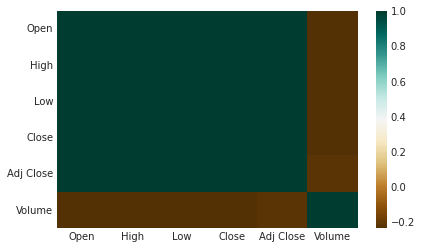

In [29]:
import seaborn as sns
sns.heatmap(corr_matrix,cmap='BrBG')

In [30]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'open and Close')

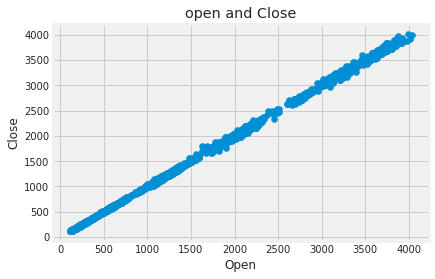

In [31]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('open and Close')

Text(0.5, 1.0, 'High and Close')

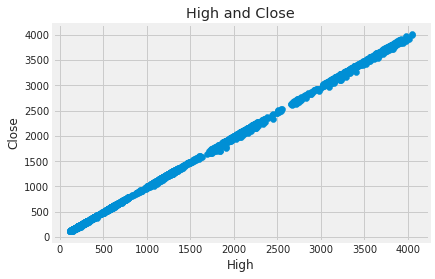

In [32]:
plt.scatter(df['High'],df['Close'])
plt.xlabel('High')
plt.ylabel('Close')
plt.title('High and Close')

Text(0.5, 1.0, 'Volume and Close')

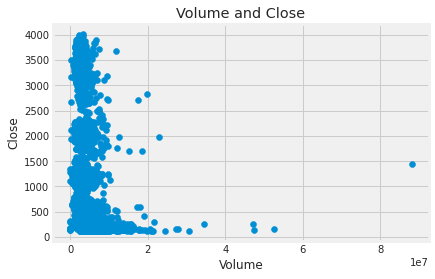

In [33]:
plt.scatter(df['Volume'],df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Volume and Close')

***Model Making***

In [34]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625,123.345001,90.293549,24465208.0


In [35]:
x = df.iloc[:,[1,2,3,6]]
y = df.iloc[:,[4]]

In [36]:
x

,Open,High,Low,Volume
0,122.800003,122.800003,119.820000,30646000.0
1,121.237503,123.750000,120.625000,24465208.0
2,123.312500,123.750000,122.000000,21194656.0
3,123.750000,124.375000,122.949997,19935544.0
4,123.737503,125.574997,123.250000,21356352.0
...,...,...,...,...
4489,3150.000000,3155.350098,3128.550049,1793722.0
4490,3159.000000,3159.000000,3112.000000,1194289.0
4491,3105.000000,3160.000000,3105.000000,1587601.0
4492,3157.800049,3160.399902,3127.000000,1021913.0


In [37]:
y

,Close
0,120.332497
1,123.345001
2,123.512497
3,123.487503
4,124.207497
...,...
4489,3144.699951
4490,3121.850098
4491,3157.300049
4492,3137.399902


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [39]:
x_train.shape

(3370, 4)

In [40]:
y_train.shape

(3370, 1)

In [41]:
x_test.shape

(1124, 4)

In [42]:
y_test.shape

(1124, 1)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = RandomForestRegressor()
mymodel = model.fit(x_train,y_train)

In [45]:
pred_y = mymodel.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(pred_y,y_test)

0.9998509498940656

***Accuracy of our model is 0.9998685435063304***